In [1]:
import numpy as np 

In [2]:
s1 = np.array([[3,0,0],[0,1,0],[0,0,0.01]])  # deformation matrix
r1 = np.array([[0.36,0.48,-0.8],[-0.8,0.6,0],[0.48,0.64,0.6]])  # rotation matrix
rndn3d1 = np.random.randn(500,3)
rndef1 = rndn3d1.dot(s1).dot(r1)
rndn3d2 = np.random.randn(500,3)
rndef2 = rndn3d2.dot(s1).dot(r1) + [0, 0, 1]
rndef = np.concatenate((rndef1, rndef2))
rndef.shape

(1000, 3)

In [3]:
# label generation
lcls1 = np.ones(500)
lcls2 = 2 * np.ones(500)
lcls = np.concatenate((lcls1, lcls2))

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


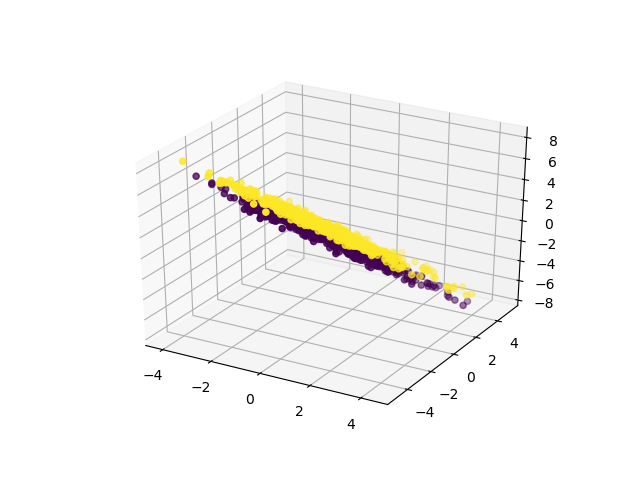

In [5]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rndef[:,0], rndef[:,1], rndef[:,2], c=lcls)
plt.show()

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [8]:
lda = LinearDiscriminantAnalysis()
lda.fit(rndef,lcls)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [9]:
rndt = lda.transform(rndef)
rndt.shape

(1000, 1)

<IPython.core.display.Javascript object>


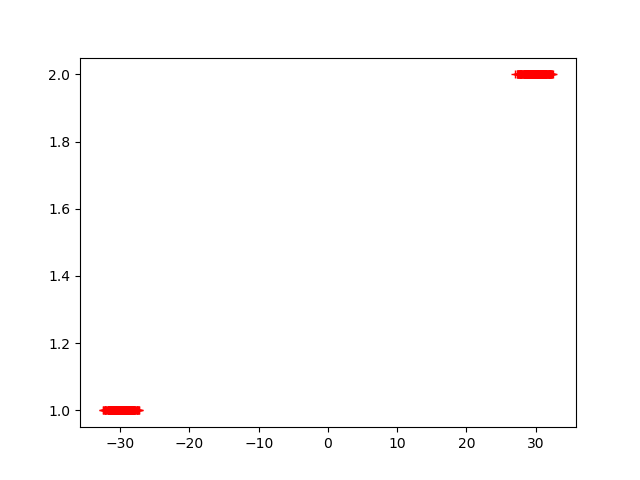

In [14]:
%matplotlib notebook
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
plt.plot(rndt, lcls, 'r+')
plt.show()

In [27]:
# let's apply now PCA before doing the DFA
from sklearn.decomposition import PCA

In [28]:
pca = PCA(n_components=2)
pca.fit(rndef)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [29]:
rndp = pca.transform(rndef)
rndp.shape

(1000, 2)

<IPython.core.display.Javascript object>


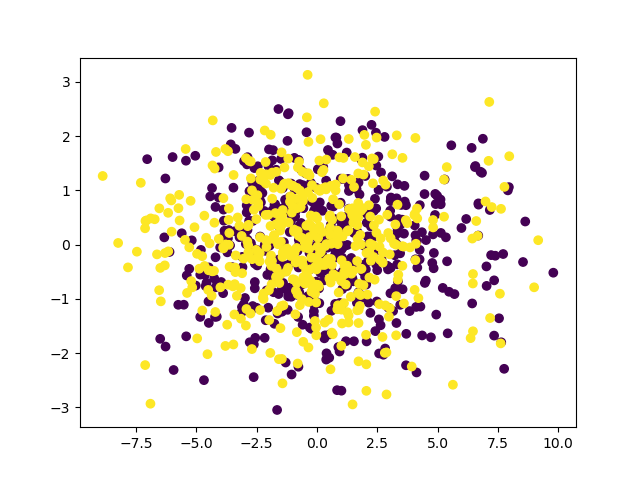

In [30]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.scatter(rndp[:,0], rndp[:,1], c=lcls)
plt.show()

In [32]:
# Now we apply DFA after with data comming from PCA
lda1 = LinearDiscriminantAnalysis()
lda1.fit(rndp,lcls)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [33]:
rndpt = lda1.transform(rndp)
rndpt.shape

(1000, 1)

<IPython.core.display.Javascript object>


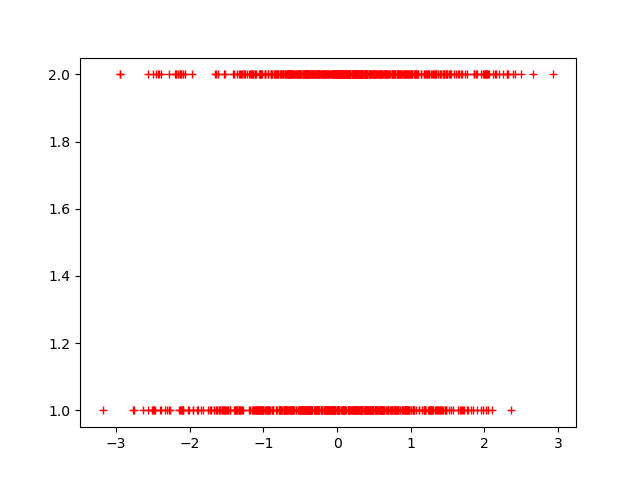

In [34]:
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
plt.plot(rndpt, lcls, 'r+')
plt.show()

In [51]:
# DFA and PCA on "texture" data 
from io import StringIO
textures = np.loadtxt('texture.dat')

In [52]:
textures[0, :]

array([-1.2226029 , -0.7977774 , -0.86744218, -0.63887554, -0.54510231,
       -0.41181352, -0.79450348, -0.62934983, -0.54675492, -0.86780117,
       -1.2226029 , -0.8786102 , -0.74737968, -0.81847165, -0.67106442,
       -0.71786354, -0.99137034, -0.77832243, -0.75940091, -0.89161861,
       -1.2226029 , -0.89923053, -0.987417  , -0.74997359, -0.69924684,
       -0.56595689, -0.91090833, -0.78610279, -0.70020467, -1.01457595,
       -1.2226029 , -0.76599832, -0.55465601, -0.71373247, -0.54533117,
       -0.58677854, -0.87060682, -0.62042811, -0.56776317, -0.60677845,
        2.        ])

In [53]:
# Applying PCA
textures_feat = textures[:, 0:40]
textures_labels = textures[:, -1]
pca2 = PCA(n_components=3)
pca2.fit(textures_feat)
textu_transf = pca2.transform(textures_feat)

<IPython.core.display.Javascript object>


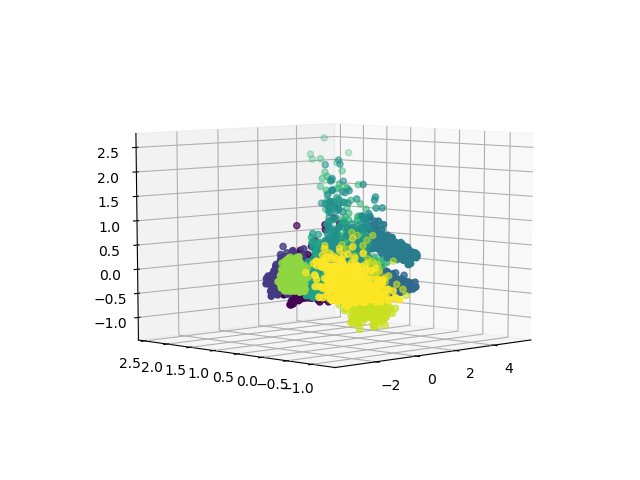

In [61]:
%matplotlib notebook
fig4 = plt.figure()
ax4 = fig4.add_subplot(111, projection='3d')
ax4.scatter(textu_transf[:,0], textu_transf[:,1], textu_transf[:,2], c=textures_labels)
plt.show()

In [59]:
lda2 = LinearDiscriminantAnalysis(n_components = 3)
lda2.fit(textures_feat, textures_labels)
textu_transf2 = lda2.transform(textures_feat)
textu_transf2.shape

/home/jeslava/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


(5500, 3)

<IPython.core.display.Javascript object>


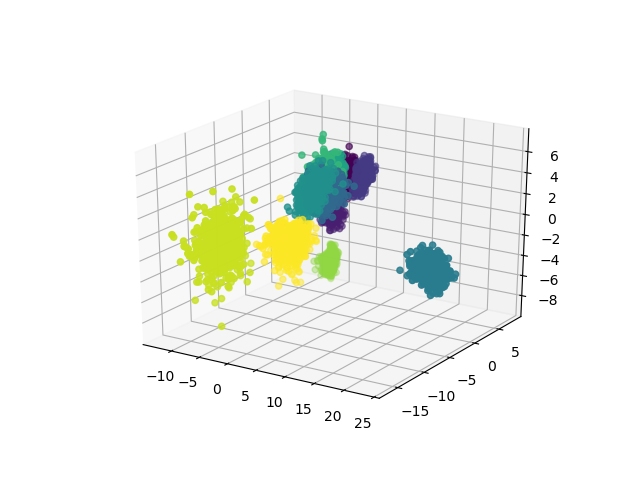

In [62]:
%matplotlib notebook
fig5 = plt.figure()
ax5 = fig5.add_subplot(111, projection='3d')
ax5.scatter(textu_transf2[:,0], textu_transf2[:,1], textu_transf2[:,2], c=textures_labels)
plt.show()

In [72]:
# Spliting on train and test set
from sklearn.model_selection import train_test_split
train, test = train_test_split(textures, test_size = 0.2)
x_train, y_train = train[:, 0:40], train[:, -1]
x_test, y_test = test[:, 0:40], test[:, -1]

In [74]:
lda3 = LinearDiscriminantAnalysis(n_components = 3)
lda3.fit(x_train, y_train)
textu_transf3 = lda3.transform(x_train)
textu_transf3.shape

/home/jeslava/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


(4400, 3)

<IPython.core.display.Javascript object>


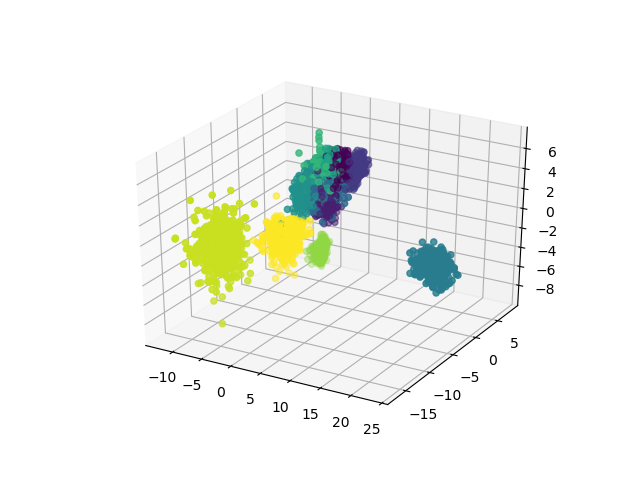

In [75]:
%matplotlib notebook
fig6 = plt.figure()
ax6 = fig6.add_subplot(111, projection='3d')
ax6.scatter(textu_transf3[:,0], textu_transf3[:,1], textu_transf3[:,2], c=y_train)
plt.show()

In [81]:
y_pred = lda3.predict(x_test)

In [82]:
error = np.zeros(y_test.size)
error.shape

(1100,)

In [90]:
from sklearn.metrics import accuracy_score

In [91]:
accuracy_score(y_test, y_pred)

0.9954545454545455

In [92]:
# Working with leaf dataset
from io import StringIO
leaf = np.loadtxt('leaf.csv', delimiter=',')
leaf[:2,:]

array([[1.0000e+00, 1.0000e+00, 7.2694e-01, 1.4742e+00, 3.2396e-01,
        9.8535e-01, 1.0000e+00, 8.3592e-01, 4.6566e-03, 3.9465e-03,
        4.7790e-02, 1.2795e-01, 1.6108e-02, 5.2323e-03, 2.7477e-04,
        1.1756e+00],
       [1.0000e+00, 2.0000e+00, 7.4173e-01, 1.5257e+00, 3.6116e-01,
        9.8152e-01, 9.9825e-01, 7.9867e-01, 5.2423e-03, 5.0016e-03,
        2.4160e-02, 9.0476e-02, 8.1195e-03, 2.7080e-03, 7.4846e-05,
        6.9659e-01]])

<IPython.core.display.Javascript object>


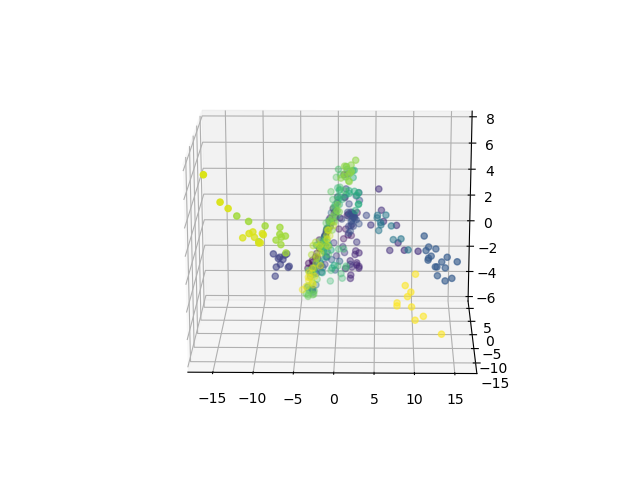

In [95]:
lda7 = LinearDiscriminantAnalysis(n_components = 3)
lda7.fit(leaf[:,2:],leaf[:,0])
leafl = lda7.transform(leaf[:,2:])
fig7 = plt.figure()
ax7 = fig7.add_subplot(111, projection='3d')
ax7.scatter(leafl[:,0],leafl[:,1],leafl[:,2],c=leaf[:,0])
plt.show()

In [101]:
leaf_train, leaf_test =train_test_split(leaf, test_size = 0.2)
leaf_x_train, leaf_y_train = leaf_train[:,2:],leaf_train[:,0]
leaf_x_test, leaf_y_test = leaf_test[:,2:],leaf_test[:,0]

In [103]:
lda8 = LinearDiscriminantAnalysis()
lda8.fit(leaf_x_train, leaf_y_train)
leaf_y_pred = lda8.predict(leaf_x_test)
accuracy_score(leaf_y_test, leaf_y_pred)

0.8235294117647058